In [11]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import style
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [12]:
#reading the dataset
walmart_dataset=pd.read_csv('C:/Users/Administrator/Desktop/simplilearn/projects/Walmart_Store_sales.csv')

In [13]:
print(walmart_dataset.describe().transpose())
filter=walmart_dataset['Weekly_Sales']==walmart_dataset['Weekly_Sales'].max()

               count          mean            std         min         25%  \
Store         6435.0  2.300000e+01      12.988182       1.000      12.000   
Weekly_Sales  6435.0  1.046965e+06  564366.622054  209986.250  553350.105   
Holiday_Flag  6435.0  6.993007e-02       0.255049       0.000       0.000   
Temperature   6435.0  6.066378e+01      18.444933      -2.060      47.460   
Fuel_Price    6435.0  3.358607e+00       0.459020       2.472       2.933   
CPI           6435.0  1.715784e+02      39.356712     126.064     131.735   
Unemployment  6435.0  7.999151e+00       1.875885       3.879       6.891   

                        50%           75%           max  
Store             23.000000  3.400000e+01  4.500000e+01  
Weekly_Sales  960746.040000  1.420159e+06  3.818686e+06  
Holiday_Flag       0.000000  0.000000e+00  1.000000e+00  
Temperature       62.670000  7.494000e+01  1.001400e+02  
Fuel_Price         3.445000  3.735000e+00  4.468000e+00  
CPI              182.616521  2.1274

In [14]:
#store with maximum weekly sales
print(walmart_dataset['Store'].where(filter).dropna()) 

1905    14.0
Name: Store, dtype: float64


In [15]:
#store with maximum standard deviation
x=walmart_dataset.groupby('Store').describe()
filter=x['Weekly_Sales']['std']==x['Weekly_Sales']['std'].max()
print(x.index.where(filter).dropna())

Float64Index([14.0], dtype='float64', name='Store')


In [16]:
##quartley growth
walmart_dataset['Date']=[dt.strptime(x,'%d-%m-%Y') for x in list(walmart_dataset['Date'])]

quarter_2=walmart_dataset[walmart_dataset['Date'].between('2012-01-01','2012-03-31')]
quarter_3=walmart_dataset[walmart_dataset['Date'].between('2012-04-01','2012-06-30')]

print((quarter_3.groupby('Store').describe()['Weekly_Sales']['std']-quarter_2.groupby('Store').describe()['Weekly_Sales']['std'])/quarter_2.groupby('Store').describe()['Weekly_Sales']['std'])

Store
1    -0.275527
2    -0.428395
3    -0.383404
4    -0.344651
5    -0.118503
6    -0.175113
7     1.009900
8    -0.492255
9    -0.371836
10   -0.349078
11   -0.264623
12   -0.579519
13   -0.290040
14    0.497651
15    0.111549
16    1.306156
17   -0.452162
18   -0.344824
19    0.175801
20   -0.079545
21   -0.510412
22    0.082377
23    0.187495
24    0.104298
25    0.563796
26   -0.009503
27    0.029331
28   -0.279089
29   -0.168859
30    0.203751
31   -0.456736
32   -0.088438
33    0.129064
34   -0.403399
35   -0.248750
36    0.340981
37    0.006670
38    0.120106
39    0.512016
40    0.051050
41    0.054635
42    0.159690
43   -0.169517
44   -0.019341
45   -0.285044
Name: std, dtype: float64


In [17]:
#holidays with higher sales
holiday_sales=walmart_dataset[['Store','Date','Weekly_Sales','Holiday_Flag']].where(walmart_dataset['Holiday_Flag']==1)
non_holiday_sales=walmart_dataset[['Store','Date','Weekly_Sales','Holiday_Flag']].where(walmart_dataset['Holiday_Flag']==0)

holiday_sales=holiday_sales.dropna()
non_holiday_sales=non_holiday_sales.dropna()

impact=holiday_sales[holiday_sales['Weekly_Sales']>non_holiday_sales['Weekly_Sales'].mean()]
print(impact.groupby('Date').describe())

           Store                                                       \
           count       mean        std  min    25%   50%    75%   max   
Date                                                                    
2010-02-12  21.0  19.523810  12.035859  1.0  11.00  19.0  28.00  41.0   
2010-09-10  19.0  18.736842  11.737131  1.0  10.50  19.0  26.50  41.0   
2010-11-26  30.0  21.533333  12.159099  1.0  12.25  21.5  30.25  45.0   
2010-12-31  16.0  17.000000  11.195237  1.0   9.00  16.5  24.75  39.0   
2011-02-11  20.0  18.750000  11.800424  1.0  10.75  18.5  27.25  41.0   
2011-09-09  20.0  19.400000  11.802765  1.0  10.75  19.5  27.25  41.0   
2011-11-25  31.0  21.387097  11.982424  1.0  12.50  21.0  29.50  45.0   
2011-12-30  19.0  18.789474  12.122426  1.0  10.50  19.0  27.50  41.0   
2012-02-10  22.0  19.772727  11.767315  1.0  11.25  19.5  27.75  41.0   
2012-09-07  22.0  20.272727  12.064043  1.0  11.50  19.5  27.75  41.0   

           Weekly_Sales                ...        

In [25]:
#converting string date to date format
days = [(x - walmart_dataset['Date'][0]) for x in list(walmart_dataset['Date'])]
walmart_dataset['Week']=[np.timedelta64(x, 'D').astype(int)/7+1 for x in days]
print(walmart_dataset['Week'])

0         1.0
1         2.0
2         3.0
3         4.0
4         5.0
5         6.0
6         7.0
7         8.0
8         9.0
9        10.0
10       11.0
11       12.0
12       13.0
13       14.0
14       15.0
15       16.0
16       17.0
17       18.0
18       19.0
19       20.0
20       21.0
21       22.0
22       23.0
23       24.0
24       25.0
25       26.0
26       27.0
27       28.0
28       29.0
29       30.0
        ...  
6405    114.0
6406    115.0
6407    116.0
6408    117.0
6409    118.0
6410    119.0
6411    120.0
6412    121.0
6413    122.0
6414    123.0
6415    124.0
6416    125.0
6417    126.0
6418    127.0
6419    128.0
6420    129.0
6421    130.0
6422    131.0
6423    132.0
6424    133.0
6425    134.0
6426    135.0
6427    136.0
6428    137.0
6429    138.0
6430    139.0
6431    140.0
6432    141.0
6433    142.0
6434    143.0
Name: Week, Length: 6435, dtype: float64


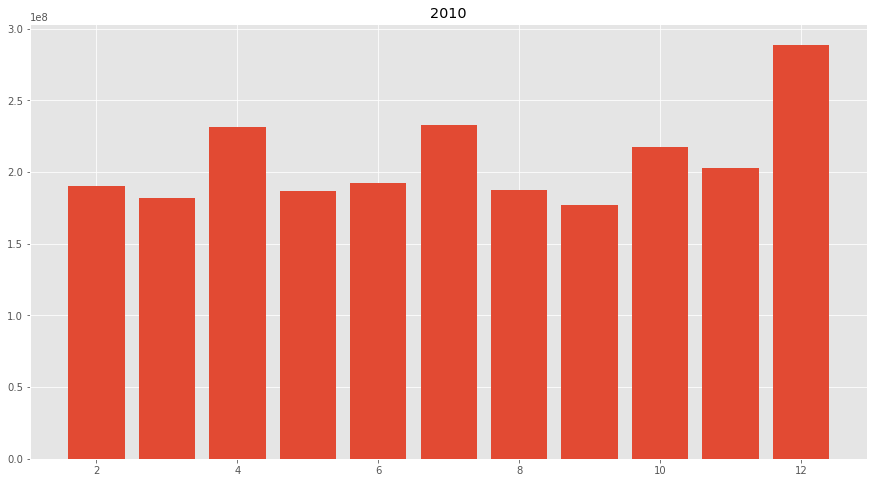

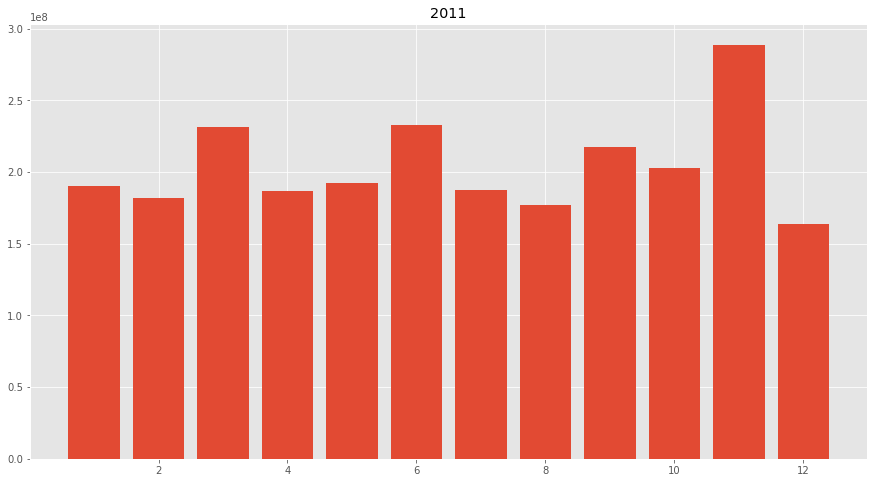

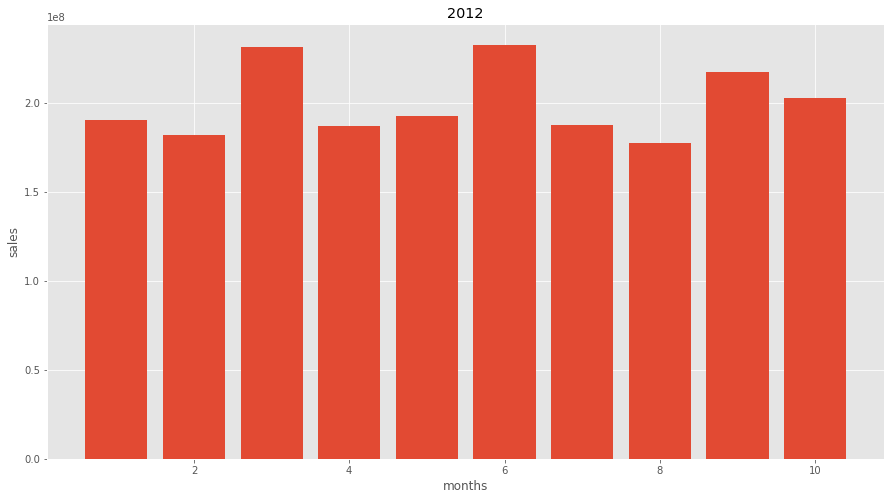

In [334]:
#monthly insights of each year
style.use('ggplot')
plt.figure(figsize=[15,8])
month_plotting=pd.DataFrame()
month_plotting['month']= list(x.month for x in walmart_dataset['Date'])
month_plotting['year']=list(x.year for x in walmart_dataset['Date'])
month_plotting['Weekly_Sales']=walmart_dataset['Weekly_Sales']
x=month_plotting.groupby(['year','month']).sum()
x=x.reset_index(level=0,drop=True)
#print(x['Weekly_Sales'][23:33])
months=np.array(y for y in range(1,13))
plt.bar(x['Weekly_Sales'][:11].index,x['Weekly_Sales'][:11].values)
plt.title('2010')
plt.xlabel('months')
plt.ylabel('sales')
plt.show()
plt.figure(figsize=[15,8])
plt.bar(x['Weekly_Sales'][11:23].index,x['Weekly_Sales'][:12].values)
plt.title('2011')
plt.xlabel('months')
plt.ylabel('sales')
plt.show()
plt.figure(figsize=[15,8])
plt.bar(x['Weekly_Sales'][23:33].index,x['Weekly_Sales'][:10].values)
plt.title('2012')
plt.xlabel('months')
plt.ylabel('sales')
plt.show()



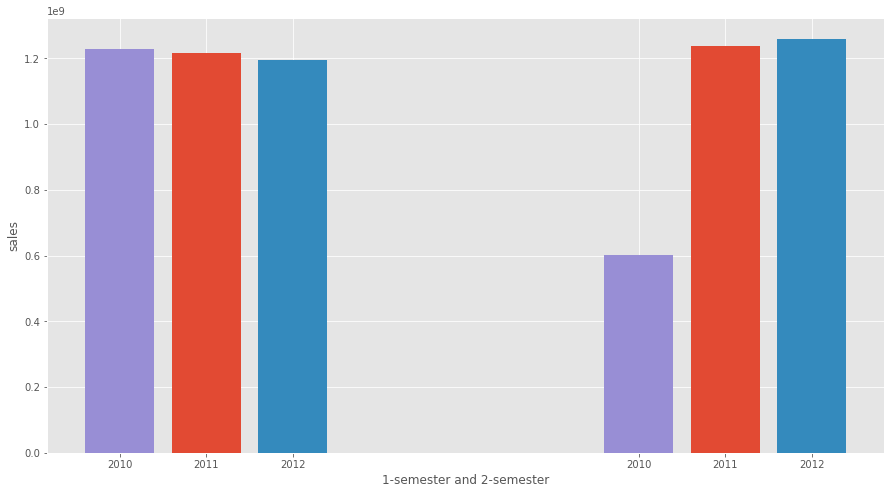

In [488]:
#sales semester wise
semester=pd.DataFrame()
semester['month']=np.array([6,12,6,12,6,12])
semester['sales']=pd.DataFrame(x.iloc[i:i+6].sum().values for i in range(0,33,6))
semester.set_index('month',inplace=True)
plt.figure(figsize=[15,8])
plt.bar(semester[:2].index.values+1,(semester[:2].values.reshape(2)))
plt.bar(semester[2:4].index.values+2,(semester[2:4].values.reshape(2)))
plt.bar(semester[4:6].index.values,(semester[4:6].values.reshape(2)))
plt.xticks([6,7,8,12,13,14],[2010,2011,2012,2010,2011,2012])
plt.xlabel("1-semester and 2-semester")
plt.ylabel("sales")
plt.show()



In [495]:
#assigning features and label
X_feature=walmart_dataset.drop(['Weekly_Sales','Date','Fuel_Price'],axis=1)
y_label=walmart_dataset['Weekly_Sales']

Text(0, 0.5, 'weekly sales')

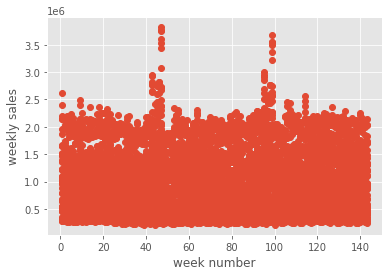

In [496]:
plt.plot(X_feature['Week'],y_label,'o')
plt.xlabel("week number")
plt.ylabel("weekly sales")

In [497]:
#using the linear regression algorithm
linreg=LinearRegression()

In [498]:
#training and testing the data
X_train,X_test,y_train,y_test=train_test_split(X_feature,y_label)
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [499]:
#the predicted values
y_predict=linreg.predict(X_test)
print(y_predict)

[1206828.25653116  811432.45265622 1183192.92186963 ...  916171.40195039
 1167210.16087863  947836.2525009 ]


In [500]:
#root mean square value of the algorithm
print(np.sqrt(((y_predict-y_test) ** 2).mean()))

513613.17274759343
